In [2]:
# ============================================
# 📚 Importing Required Libraries (Google Colab)
# ============================================

# Data handling and analysis
import pandas as pd
import numpy as np
import seaborn as sns

# System + utility tools
import os
import operator
import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics, tree
from sklearn.tree import plot_tree
from scipy.stats import randint
from numpy import argmax

# Google Colab upload utilities
from google.colab import files
import io

print("📤 Ready to upload data files into Colab!")
print("✅ All libraries loaded successfully.")



📤 Ready to upload data files into Colab!
✅ All libraries loaded successfully.
📤 Ready to upload data files into Colab!
✅ All libraries loaded successfully.


In [3]:
# --- STEP 1: Upload cleaned climate dataset ---
print("📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
climate = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded cleaned climate dataset: {first_file}")

# Preview
print("\n🌦 Climate data preview:")
display(climate.head())


# --- STEP 2: Upload prediction dataset ---
print("\n📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
prediction = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded prediction dataset: {first_file}")

# Preview
print("\n🔎 Prediction data preview:")
display(prediction.head())


📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)


Saving climate_clean_data_new.csv to climate_clean_data_new (1).csv
✅ Loaded cleaned climate dataset: climate_clean_data_new (1).csv

🌦 Climate data preview:


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0


📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'


Saving Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv to Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv
✅ Loaded prediction dataset: Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv

🔎 Prediction data preview:


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
climate.shape

(22950, 137)

In [5]:
prediction.shape

(22950, 16)

In [6]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [7]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [8]:
# Reduce observations dataset to the 2010s
dfdecade = climate[climate['DATE'].astype(str).str.startswith('201')]
dfdecade


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.9965,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,7,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0193,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [9]:
# Reduce pleasant weather dataset to the 2010s
pleasant_decade = prediction[prediction['DATE'].astype(str).str.startswith('201')]
pleasant_decade


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [11]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [12]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]

    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
SONNBLICK: 32868 entries
BASEL: 32868 entries
MUNCHENB: 32868 entries
STOCKHOLM: 32868 entries
VALENTIA: 32868 entries
DUSSELDORF: 32868 entries
HEATHROW: 32868 entries
BUDAPEST: 32868 entries
OSLO: 32868 entries
DEBILT: 32868 entries
MADRID: 32868 entries
MAASTRICHT: 32868 entries
LJUBLJANA: 32868 entries
BELGRADE: 32868 entries
KASSEL: 32868 entries


In [13]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [14]:
dfdecade.shape

(3652, 135)

In [15]:
pleasant_decade.drop(columns = 'DATE', inplace = True)

In [16]:
pleasant_decade.shape

(3652, 15)

In [17]:
X = dfdecade

In [18]:
y = pleasant_decade

In [19]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [20]:
X.shape

(3652, 135)

In [21]:
y.shape

(3652, 15)

In [22]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


In [24]:
# Create a RF classifier

clf = RandomForestClassifier()

In [30]:
grid_space = {
    'max_depth': [5, 10, None],       # deeper trees, still limited
    'n_estimators': [50, 100],        # moderate number of trees
    'max_features': [50, 100],        # reduced feature options
    'min_samples_leaf': [1, 2],       # small leaves
    'min_samples_split': [2, 4]       # reasonable splits
}

In [31]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 16.411082907517752 minutes


In [32]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6396495071193866


In [33]:
# Define parameter space for RandomizedSearchCV
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],  # deeper trees up to 100 plus unlimited
    'n_estimators': np.arange(150, 250, step=25),             # number of trees from 150 to 225
    'max_features': randint(30, 70),                          # random selection of features
    'criterion': ['gini', 'entropy'],                         # split criterion options
    'min_samples_leaf': randint(1, 4),                        # minimum samples per leaf
    'min_samples_split': np.arange(2, 10, step=2)             # minimum samples to split a node
}


In [34]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [35]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 9.781323575973511 minutes


In [36]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6396495071193866
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': np.int64(80), 'max_features': 51, 'min_samples_leaf': 1, 'min_samples_split': np.int64(6), 'n_estimators': np.int64(200)}
Best RANDOM search score is: 0.6389193136181088


In [37]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=150)

In [38]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6736035049288062


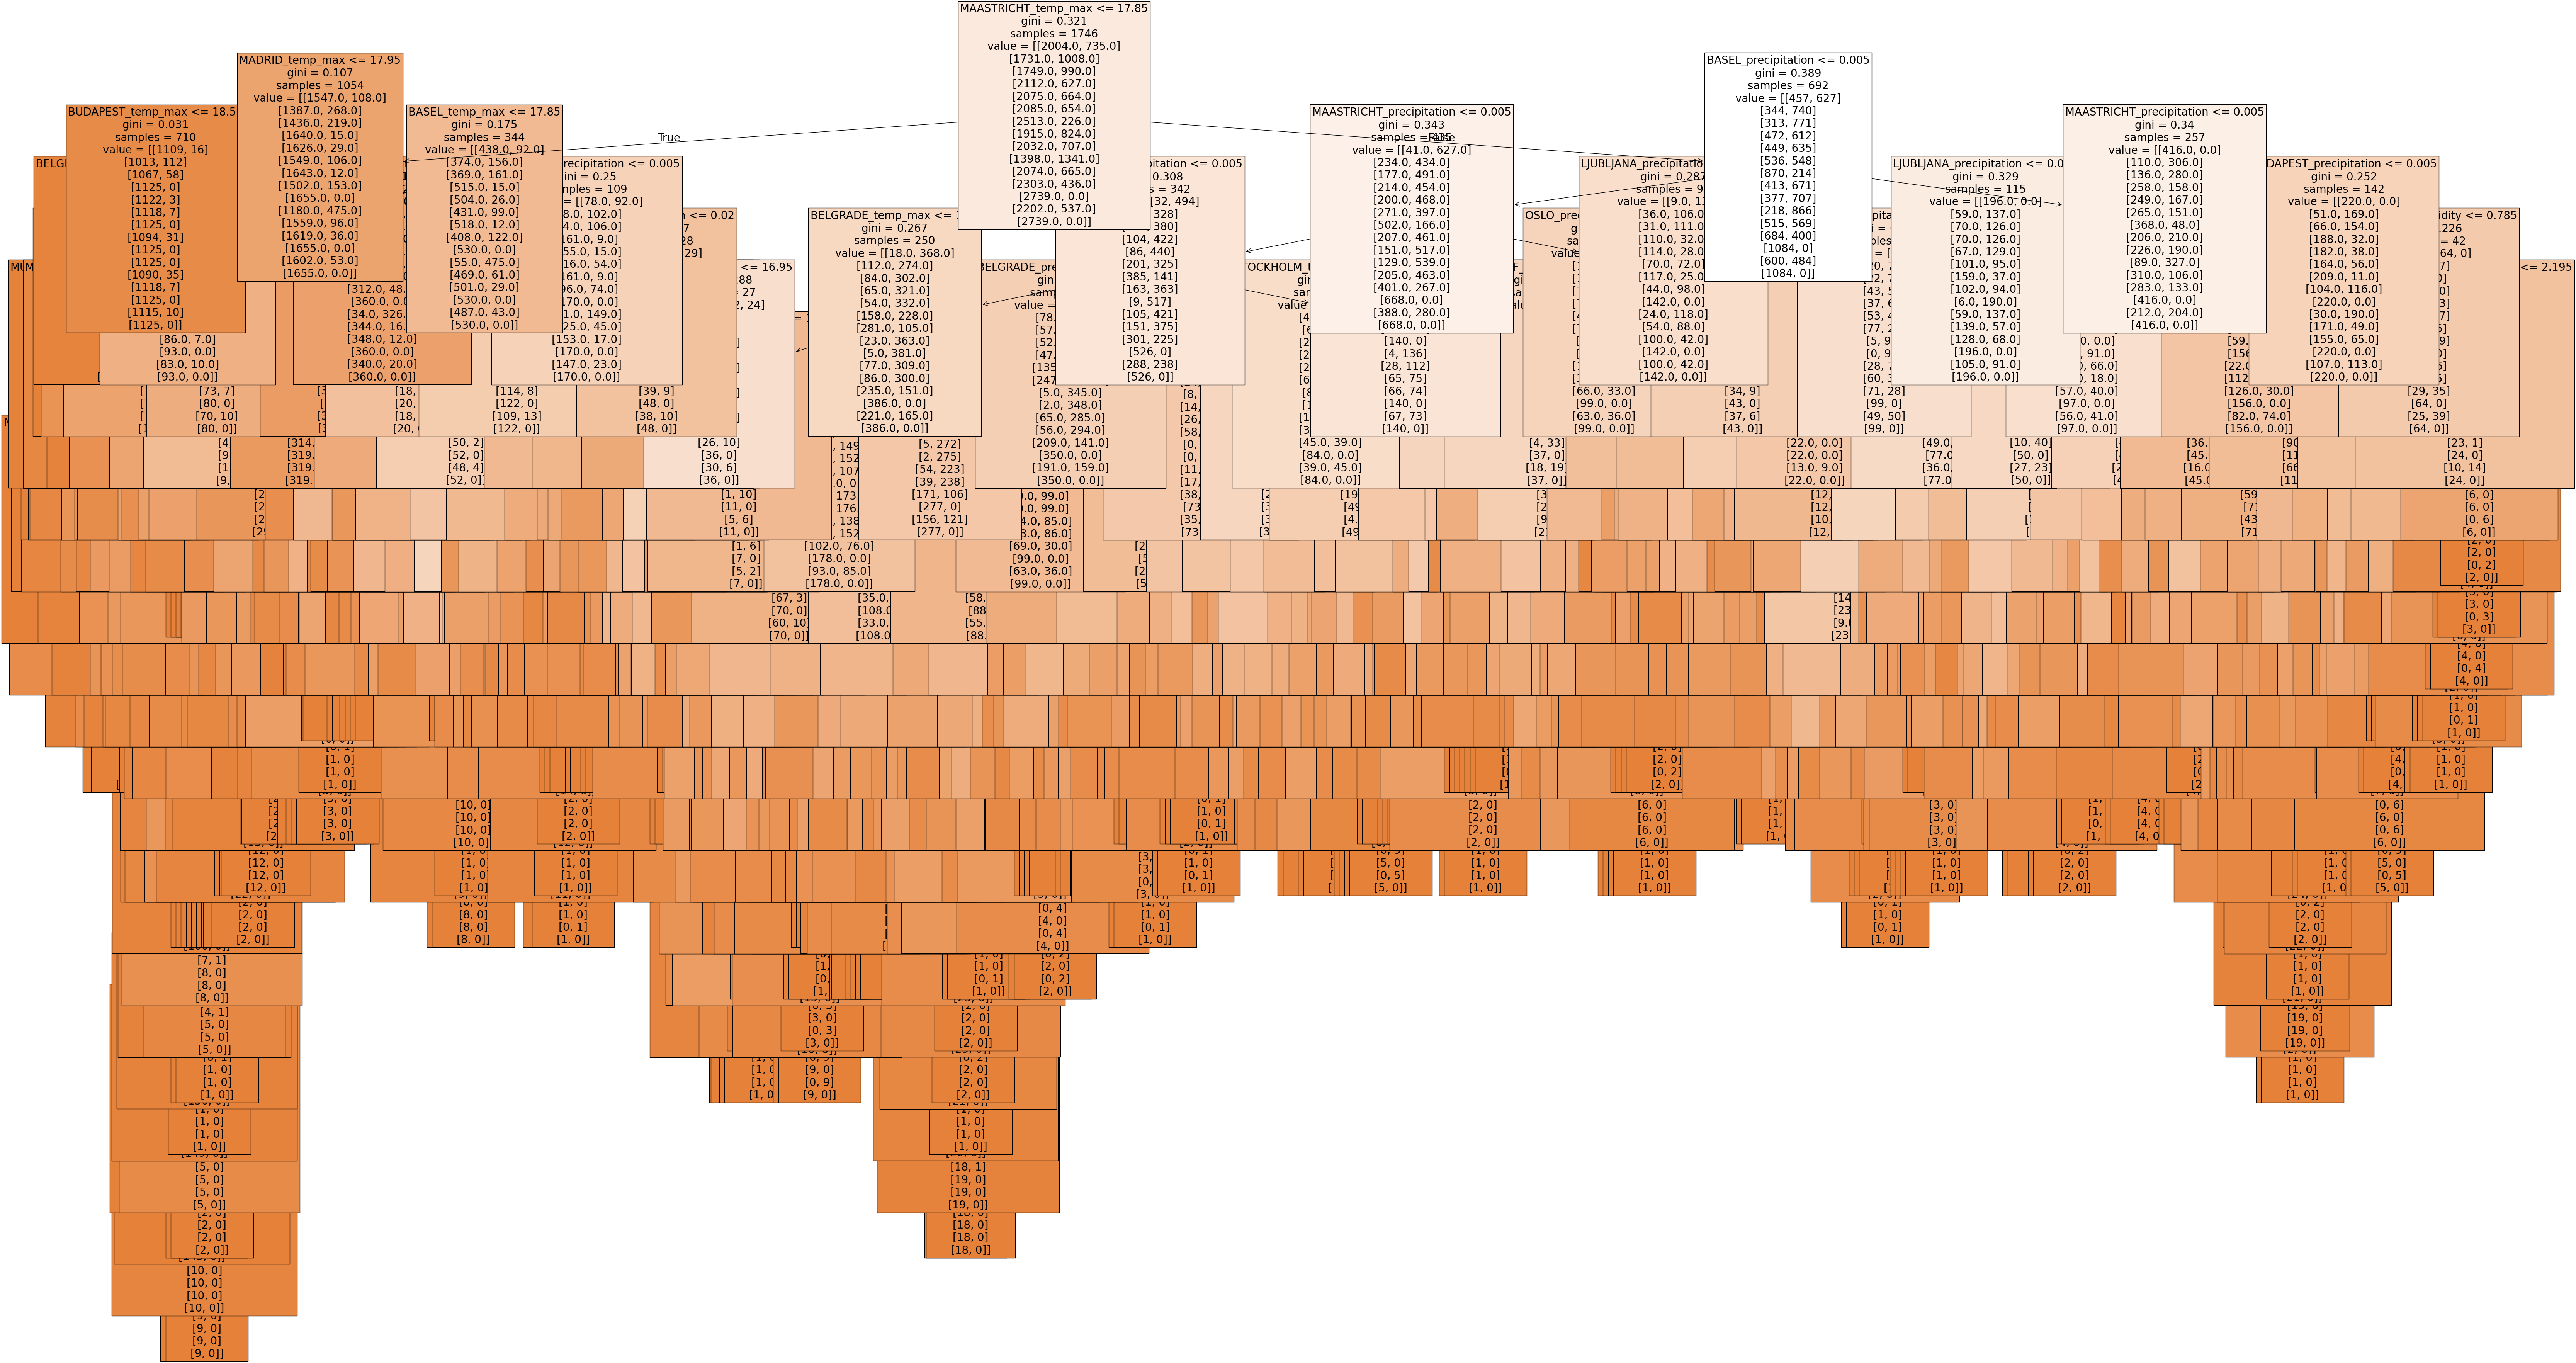

In [39]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [40]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.67562812e-03, 2.37397373e-03, 2.04620988e-03, 2.41397776e-03,
       2.96152151e-02, 3.93908519e-03, 8.53435483e-03, 1.98034488e-03,
       7.73676945e-02, 2.48588933e-03, 2.43441838e-03, 2.42793690e-03,
       2.04360800e-03, 2.65778656e-02, 2.33756184e-03, 3.77797859e-03,
       2.02564113e-03, 8.53141080e-03, 2.41028402e-04, 0.00000000e+00,
       0.00000000e+00, 9.01704072e-04, 2.53768908e-02, 1.03556673e-03,
       7.05030423e-03, 2.04687353e-03, 1.74287813e-02, 1.47258807e-03,
       1.99004484e-03, 2.53303328e-03, 2.37736475e-03, 1.73483446e-02,
       2.69528659e-03, 2.35720381e-03, 2.26392431e-03, 4.16837064e-02,
       1.32412034e-03, 1.76977740e-03, 2.19476633e-03, 2.14527836e-03,
       3.21799108e-02, 2.65544645e-03, 8.38930589e-03, 1.82942617e-03,
       9.43270753e-02, 1.81816156e-03, 3.31447456e-03, 2.02640362e-03,
       3.28416601e-03, 1.38389048e-02, 3.52134806e-03, 2.97616739e-03,
       2.16075197e-03, 9.57782031e-03, 1.43319074e-03, 1.54400959e-03,
      

In [41]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.67562812e-03, 2.37397373e-03, 2.04620988e-03, 2.41397776e-03,
         2.96152151e-02, 3.93908519e-03, 8.53435483e-03, 1.98034488e-03,
         7.73676945e-02],
        [2.48588933e-03, 2.43441838e-03, 2.42793690e-03, 2.04360800e-03,
         2.65778656e-02, 2.33756184e-03, 3.77797859e-03, 2.02564113e-03,
         8.53141080e-03],
        [2.41028402e-04, 0.00000000e+00, 0.00000000e+00, 9.01704072e-04,
         2.53768908e-02, 1.03556673e-03, 7.05030423e-03, 2.04687353e-03,
         1.74287813e-02],
        [1.47258807e-03, 1.99004484e-03, 2.53303328e-03, 2.37736475e-03,
         1.73483446e-02, 2.69528659e-03, 2.35720381e-03, 2.26392431e-03,
         4.16837064e-02],
        [1.32412034e-03, 1.76977740e-03, 2.19476633e-03, 2.14527836e-03,
         3.21799108e-02, 2.65544645e-03, 8.38930589e-03, 1.82942617e-03,
         9.43270753e-02],
        [1.81816156e-03, 3.31447456e-03, 2.02640362e-03, 3.28416601e-03,
         1.38389048e-02, 3.52134806e-03, 2.97616739e-03, 2.16075197

In [42]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12994648, 0.05264231, 0.05408115, 0.0747215 , 0.14681511,
       0.0425182 , 0.02663656, 0.07710158, 0.15078583, 0.0754337 ,
       0.06504707, 0.04442128, 0.01876675, 0.03802834, 0.00305415])

In [43]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [44]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [46]:
 #Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [47]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

,0
OSLO,0.150786
VALENTIA,0.146815
SONNBLICK,0.129946
BUDAPEST,0.077102
DEBILT,0.075434
STOCKHOLM,0.074721
MADRID,0.065047
MUNCHENB,0.054081
BASEL,0.052642
MAASTRICHT,0.044421


In [48]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['SONNBLICK', 'BASEL', 'MUNCHENB', 'STOCKHOLM', 'VALENTIA', 'DUSSELDORF', 'HEATHROW', 'BUDAPEST', 'OSLO', 'DEBILT', 'MADRID', 'MAASTRICHT', 'LJUBLJANA', 'BELGRADE', 'KASSEL']


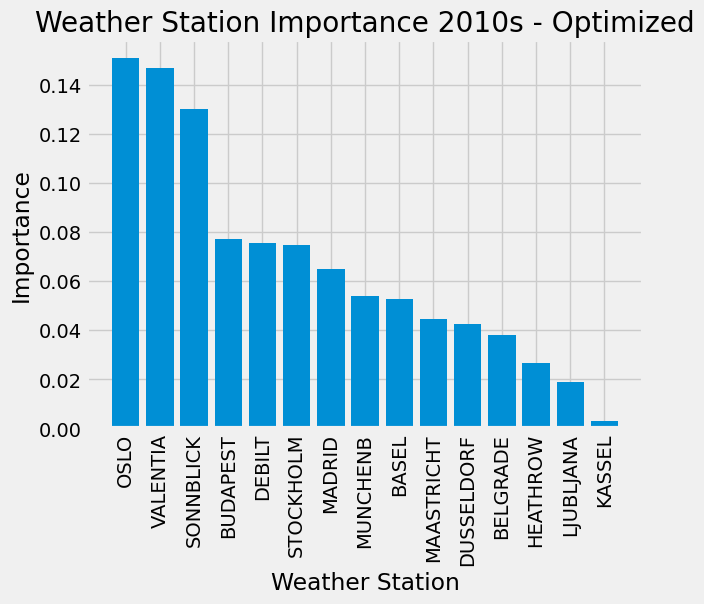

In [50]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')


plt.show()

In [52]:
# Filter weather dataset to only include Oslo
df_oslo = climate[climate.columns[climate.columns.astype(str).str.startswith('OSLO')]]

df_oslo


,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9
1,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9
2,8,0.69,1.0234,0.04,0.08,0.0,1.9,0.6,3.1
3,8,0.98,1.0244,0.04,0.35,0.0,3.0,0.4,4.9
4,8,0.96,1.0092,0.05,0.26,0.0,3.7,2.9,4.9
...,...,...,...,...,...,...,...,...,...
22945,8,0.98,1.0139,1.06,0.21,0.1,9.7,5.8,12.0
22946,8,1.00,1.0107,1.06,0.21,0.0,10.9,8.8,11.7
22947,3,0.85,1.0082,1.06,0.21,6.8,9.7,7.7,14.2
22948,5,0.94,1.0150,1.06,0.21,2.9,5.9,2.1,8.1


In [53]:
# Filter prediction dataset to only include Oslo
pleasant_oslo = prediction[prediction.columns[prediction.columns.astype(str).str.startswith('OSLO')]]

pleasant_oslo


,OSLO_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [54]:
# Create target matrix for Oslo
y2 = pleasant_oslo.max(axis=1)

y2.shape


(22950,)

In [55]:
# Ensure y has the correct shape for Oslo
y2 = y2.to_numpy().reshape(-1)

y2.shape


(22950,)

In [56]:
# Create X matrix for Oslo
X2 = df_oslo.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)


(22950, 9)
(22950,)


In [57]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [58]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [60]:
X_train

array([[  2.    ,   0.48  ,   1.0207, ...,  10.5   ,   6.2   ,  16.5   ],
       [  4.    ,   0.88  ,   1.0101, ..., -11.2   , -13.8   ,  -8.2   ],
       [  4.    ,   0.77  ,   1.0202, ..., -14.4   , -19.    , -11.7   ],
       ...,
       [  8.    ,   0.72  ,   1.0083, ...,   6.4   ,   5.2   ,   9.5   ],
       [  8.    ,   0.78  ,   1.0115, ...,   8.6   ,   6.5   ,  11.4   ],
       [  3.    ,   0.48  ,   1.0173, ...,   4.4   ,  -1.6   ,   9.6   ]])

In [61]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
X_test

array([[ 6.    ,  0.85  ,  0.9968, ..., 13.1   ,  9.4   , 20.    ],
       [ 5.    ,  0.71  ,  1.0352, ..., -4.5   , -6.    , -1.6   ],
       [ 8.    ,  0.87  ,  0.9991, ..., 14.7   , 13.9   , 16.2   ],
       ...,
       [ 8.    ,  0.89  ,  1.0196, ...,  8.    ,  6.9   ,  9.    ],
       [ 3.    ,  0.75  ,  1.0173, ..., -0.9   , -6.    ,  4.6   ],
       [ 4.    ,  0.54  ,  1.0126, ..., 11.4   ,  5.6   , 15.1   ]])

In [63]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
# Create a Random Forest classifier
clf = RandomForestClassifier()


In [65]:
grid_space = {
    'max_depth': [5, 10, None],          # reduced from 4 → 3 options
    'n_estimators': [50, 100, 150],       # reduced from 3 → 3 but centered on useful values
    'max_features': [3, 5],               # reduced from 4 → 2 options
    'min_samples_leaf': [1, 2],           # reduced from 3 → 2 options
    'min_samples_split': [2, 4]           # reduced from 3 → 2 options
}

In [66]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Search took 2.2975417534510294 minutes


In [67]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


In [68]:
# Define optimized random search space (~7 min runtime)
rs_space = {
    'max_depth': list(np.arange(5, 40, 5)) + [None],   # 5,10,15,20,25,30,35,None
    'n_estimators': np.arange(100, 250, 25),           # 100,125,150,175,200,225
    'max_features': randint(3, 8),                     # tries 3–7
    'criterion': ['gini'],                             # reduced to speed up
    'min_samples_leaf': randint(1, 3),                 # tries 1–2
    'min_samples_split': [2, 4, 6]                     # limited to 3 values
}


In [69]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [70]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 9.422490346431733 minutes


In [71]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': np.int64(10), 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': np.int64(175)}
Best RANDOM search score is: 1.0


In [72]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': np.int64(10), 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': np.int64(175)}
Best RANDOM search score is: 1.0


In [73]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(
    n_estimators=175,        # number of trees
    max_depth=10,            # maximum depth of each tree
    max_features=5,          # number of features considered at each split
    min_samples_leaf=1,      # minimum samples in a leaf node
    min_samples_split=4,     # minimum samples to split a node
    criterion='gini'         # splitting criterion
)

# Training the model on the training dataset
# fit() trains the model using the training data
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=4,
                       n_estimators=175)

In [74]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


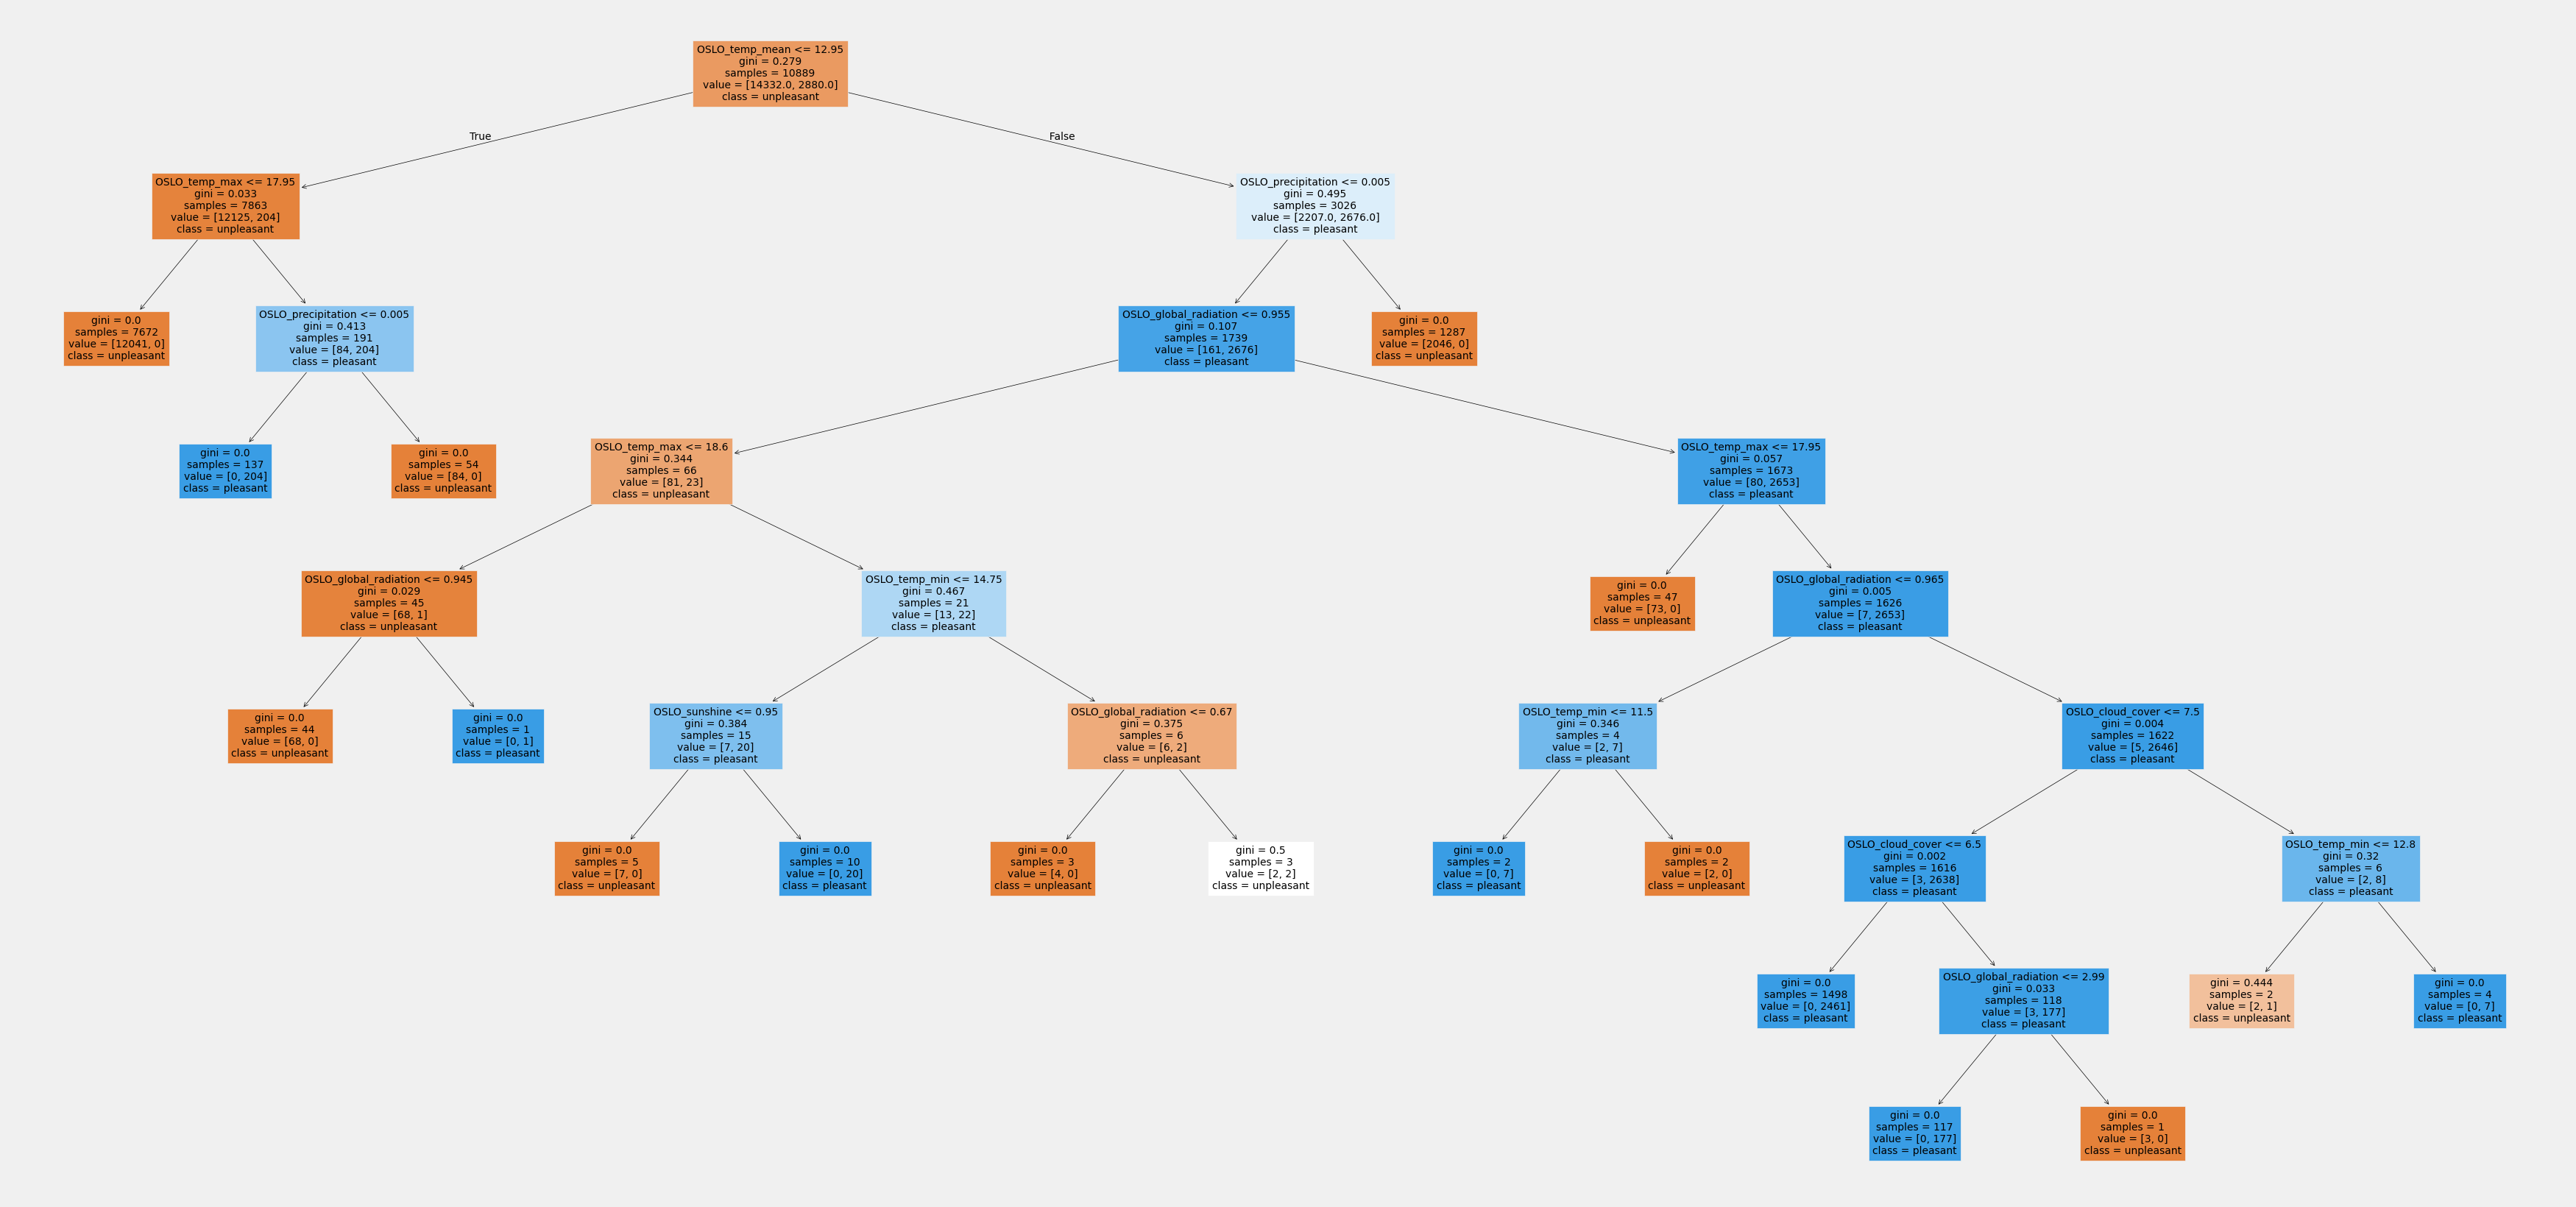

In [76]:
# Plot a tree from the selected random forest

fig = plt.figure(figsize=(40,20))
plot_tree(
    clf3.estimators_[6],
    fontsize=10,
    feature_names=df_oslo.columns,
    class_names=['unpleasant', 'pleasant'],
    filled=True
)
plt.show()


In [77]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.01338012, 0.00341437, 0.00346371, 0.04212823, 0.37197793,
       0.06071943, 0.12037337, 0.00358518, 0.38095766])

In [78]:
# Retrieve feature importances from the trained model
oslo_importance = clf3.feature_importances_
print("Feature Importances:", oslo_importance)
print(oslo_importance.shape)


Feature Importances: [0.01338012 0.00341437 0.00346371 0.04212823 0.37197793 0.06071943
 0.12037337 0.00358518 0.38095766]
(9,)


In [79]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation',
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [80]:
# Create a dataframe to associate observation measurements with their importances
oslo_importance_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': oslo_importance
})


In [81]:
# Sort by importance for chart readability
oslo_importance_df = oslo_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(oslo_importance_df)


Feature Importance:
        Measurement  Importance
8          temp_max    0.380958
4     precipitation    0.371978
6         temp_mean    0.120373
5          sunshine    0.060719
3  global_radiation    0.042128
0       cloud_cover    0.013380
7          temp_min    0.003585
2          pressure    0.003464
1          humidity    0.003414


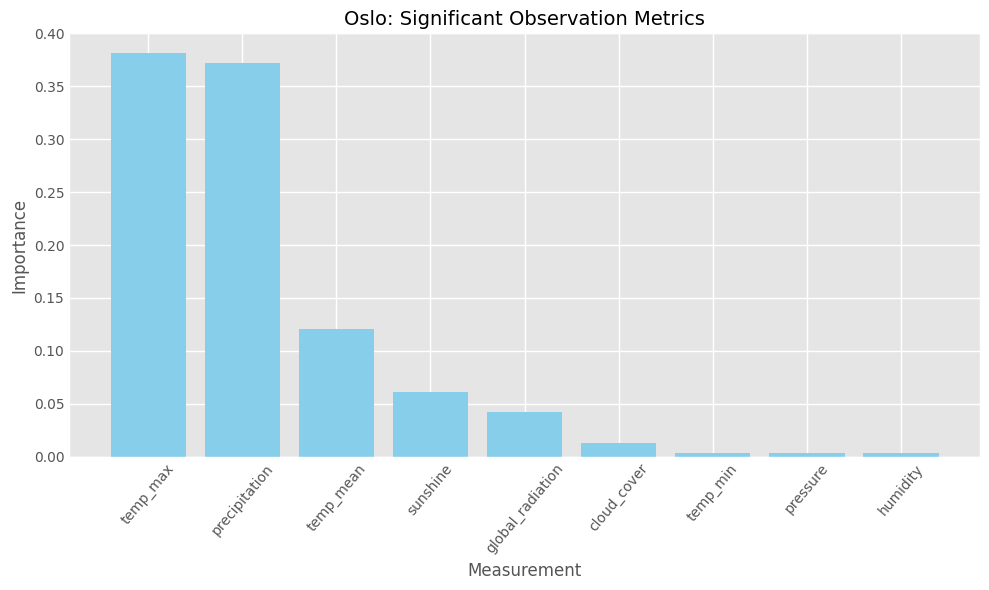

In [82]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(oslo_importance_df['Measurement'], oslo_importance_df['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Oslo: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

